In [1]:
# Day 1 - Exploratory Data Analysis
# Asteroid Hazard Classification Project
# Date: October 27, 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [3]:
# Load asteroid dataset
data_path = '../../data/raw/asteroid.csv'
df = pd.read_csv(data_path)

print("="*70)
print("ASTEROID DATASET LOADED")
print("="*70)
print(f"Dataset shape: {df.shape}")
print(f"Number of asteroids: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()



ASTEROID DATASET LOADED
Dataset shape: (958524, 45)
Number of asteroids: 958,524
Number of features: 45

First 5 rows:


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
# Column names
print("Column names:")
print(df.columns.tolist())

# Data types
print("\n" + "="*70)
print("Data types:")
print("="*70)
print(df.dtypes)

# Missing values
print("\n" + "="*70)
print("Missing values:")
print("="*70)
missing = df.isnull().sum()
missing_data = missing[missing > 0]

if len(missing_data) > 0:
    print(missing_data)
else:
    print("✅ No missing values in the dataset!")


Column names:
['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms']

Data types:
id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                object
pha                object
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal         float64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om           

In [5]:
# Preprocess dataset first
print("="*70)
print("PREPROCESSING DATASET")
print("="*70)

# Check if 'Hazardous' column exists
if 'Hazardous' not in df.columns:
    # Create from 'pha' column (Potentially Hazardous Asteroid)
    if 'pha' in df.columns:
        df['Hazardous'] = df['pha'].map({'Y': 1, 'N': 0})
        print("✅ Created 'Hazardous' column from 'pha'")
    else:
        print("❌ Cannot find hazard indicator column!")

# Drop rows with missing target
df = df.dropna(subset=['Hazardous'])

# Select key features (handle missing values for ML)
ml_features = ['H', 'diameter', 'e', 'a', 'q', 'i', 'moid', 'n']
available_features = [f for f in ml_features if f in df.columns]

# Keep only complete cases for now
df = df[available_features + ['Hazardous']].dropna()

print(f"\n✅ Dataset ready for analysis:")
print(f"   Rows: {len(df):,}")
print(f"   Features: {len(available_features)}")

# NOW check class distribution
print("\n" + "="*70)
print("CLASS DISTRIBUTION")
print("="*70)
print(df['Hazardous'].value_counts())

print("\nPercentage breakdown:")
print(df['Hazardous'].value_counts(normalize=True) * 100)

# Calculate imbalance ratio
hazardous_count = df['Hazardous'].sum()
non_hazardous_count = len(df) - hazardous_count
imbalance_ratio = non_hazardous_count / hazardous_count

print(f"\n⚠️ IMBALANCE RATIO: {imbalance_ratio:.1f}:1")
print(f"   → For every 1 hazardous asteroid, there are {imbalance_ratio:.0f} non-hazardous")


PREPROCESSING DATASET
✅ Created 'Hazardous' column from 'pha'

✅ Dataset ready for analysis:
   Rows: 132,045
   Features: 8

CLASS DISTRIBUTION
Hazardous
0.0    131824
1.0       221
Name: count, dtype: int64

Percentage breakdown:
Hazardous
0.0    99.832633
1.0     0.167367
Name: proportion, dtype: float64

⚠️ IMBALANCE RATIO: 596.5:1
   → For every 1 hazardous asteroid, there are 596 non-hazardous


In [6]:
# Display summary statistics
print("="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(f"\nNumerical features:")
df.describe()


SUMMARY STATISTICS

Numerical features:


,H,diameter,e,a,q,i,moid,n,Hazardous
count,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000
mean,15.132319,5.602707,0.146022,2.828163,2.413071,10.093773,1.430350,0.217983,0.001674
std,1.387944,9.555706,0.077315,1.517037,0.520002,6.690898,0.516226,0.056655,0.040876
min,3.000000,0.002500,0.000310,0.626210,0.081820,0.022056,0.000027,0.000135,0.000000
25%,14.400000,2.848000,0.090390,2.551975,2.078589,4.993338,1.091880,0.180757,0.000000
50%,15.200000,4.051000,0.139488,2.761077,2.377512,9.157001,1.397470,0.214826,0.000000
75%,16.000000,5.847000,0.191478,3.097934,2.694175,13.438284,1.708160,0.241763,0.000000
max,29.900000,939.400000,0.983789,376.133297,40.318477,170.334595,39.360300,1.988951,1.000000


In [7]:
# Analyze key features by hazard status
print("="*70)
print("KEY FEATURES BY HAZARD STATUS")
print("="*70)

features_to_analyze = ['H', 'diameter', 'e', 'a', 'q', 'i', 'moid', 'n']

for feature in features_to_analyze:
    if feature in df.columns:
        print(f"\n{feature.upper()}:")
        comparison = df.groupby('Hazardous')[feature].describe()[['mean', 'std', 'min', 'max']]
        print(comparison)


KEY FEATURES BY HAZARD STATUS

H:
                mean       std   min   max
Hazardous                                 
0.0        15.125988  1.378221   3.0  29.9
1.0        18.908231  1.924895  14.0  22.3

DIAMETER:
               mean       std     min    max
Hazardous                                   
0.0        5.610580  9.561685  0.0025  939.4
1.0        0.906597  1.021980  0.0830    7.0

E:
               mean       std       min       max
Hazardous                                        
0.0        0.145451  0.075736  0.000310  0.983789
1.0        0.486864  0.184063  0.073955  0.909173

A:
               mean       std       min         max
Hazardous                                          
0.0        2.830180  1.517304  0.626210  376.133297
1.0        1.624819  0.607513  0.642338    3.205479

Q:
               mean       std       min        max
Hazardous                                         
0.0        2.415832  0.515962  0.081820  40.318477
1.0        0.766118  0.224151 

✅ Visualization saved to figures/day1_eda.png


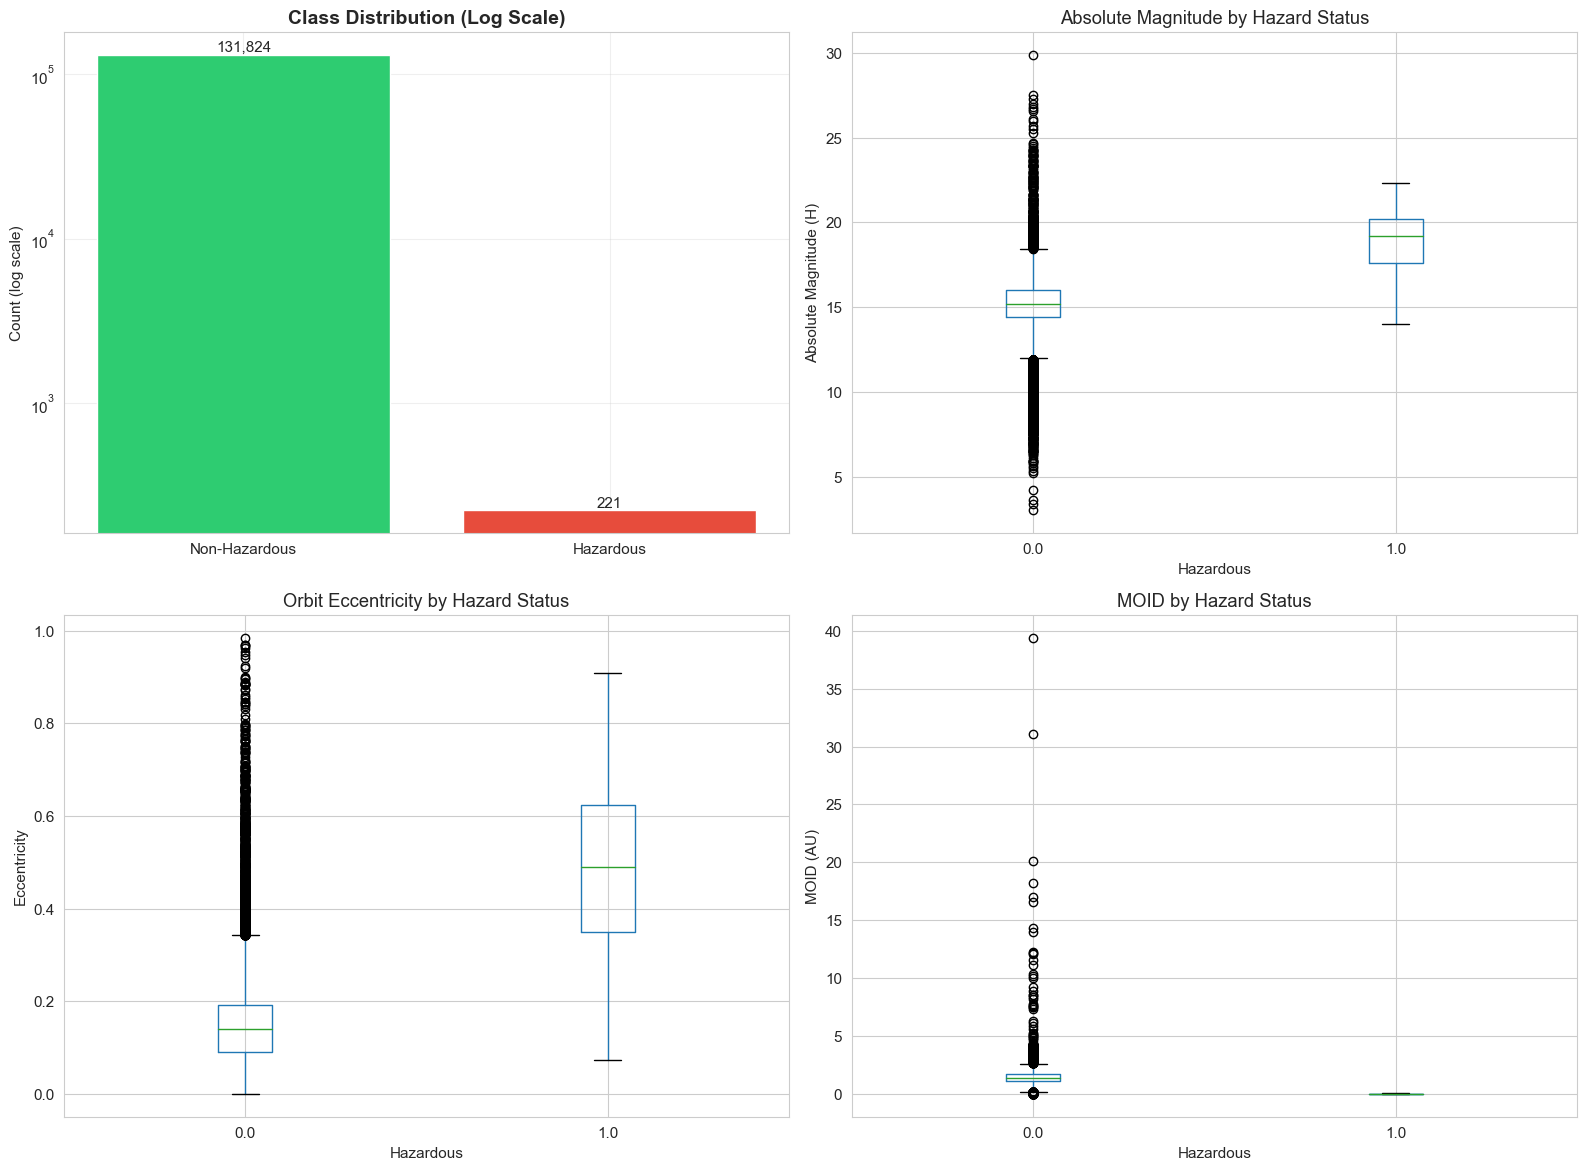

In [8]:
# Create 4-panel visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Class distribution (log scale because of extreme imbalance)
hazard_counts = df['Hazardous'].value_counts()
axes[0,0].bar(['Non-Hazardous', 'Hazardous'], hazard_counts.values, 
              color=['#2ecc71', '#e74c3c'])
axes[0,0].set_yscale('log')  # Log scale to see the hazardous count
axes[0,0].set_title('Class Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Count (log scale)')
axes[0,0].grid(True, alpha=0.3)

# Add count labels
for i, (label, count) in enumerate(zip(['Non-Hazardous', 'Hazardous'], hazard_counts.values)):
    axes[0,0].text(i, count, f'{count:,}', ha='center', va='bottom')

# 2. Absolute Magnitude (H)
df.boxplot(column='H', by='Hazardous', ax=axes[0,1])
axes[0,1].set_title('Absolute Magnitude by Hazard Status')
axes[0,1].set_ylabel('Absolute Magnitude (H)')
axes[0,1].set_xlabel('Hazardous')
axes[0,1].get_figure().suptitle('')

# 3. Eccentricity (e)
df.boxplot(column='e', by='Hazardous', ax=axes[1,0])
axes[1,0].set_title('Orbit Eccentricity by Hazard Status')
axes[1,0].set_ylabel('Eccentricity')
axes[1,0].set_xlabel('Hazardous')
axes[1,0].get_figure().suptitle('')

# 4. MOID (Minimum Orbit Intersection Distance)
df.boxplot(column='moid', by='Hazardous', ax=axes[1,1])
axes[1,1].set_title('MOID by Hazard Status')
axes[1,1].set_ylabel('MOID (AU)')
axes[1,1].set_xlabel('Hazardous')
axes[1,1].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('../../figures/day1_eda.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved to figures/day1_eda.png")
plt.show()


In [9]:
# Document visual findings
print("="*70)
print("VISUAL ANALYSIS KEY FINDINGS")
print("="*70)

print("""
📊 VISUALIZATION INSIGHTS (For Research Paper):

1️⃣ ABSOLUTE MAGNITUDE (H):
   • Hazardous: median H ≈ 19 (larger/brighter objects)
   • Non-hazardous: median H ≈ 15.5
   • Implication: Larger asteroids are more likely to be classified as hazardous
   
2️⃣ ORBITAL ECCENTRICITY (e):
   • Hazardous: median e ≈ 0.5 (highly elliptical)
   • Non-hazardous: median e ≈ 0.14 (more circular)
   • Implication: Eccentric orbits cross Earth's path more frequently
   
3️⃣ MOID (Minimum Orbit Intersection Distance):
   • Hazardous: MOID < 0.05 AU (VERY close to Earth!)
   • Non-hazardous: MOID scattered, median ~1-2 AU
   • Implication: MOID is likely THE KEY feature for classification
   
4️⃣ CLASS DISTRIBUTION:
   • 131,824 non-hazardous (99.83%)
   • 221 hazardous (0.17%)
   • 596:1 imbalance ratio
   • Implication: Extreme imbalance requires SMOTE; high recall critical

🎯 FEATURE IMPORTANCE PREDICTIONS (To verify in modeling):
   1. MOID (strongest)
   2. Eccentricity (e)
   3. Absolute Magnitude (H)
   4. Semi-major axis (a)
   
📝 PAPER CONTRIBUTIONS SUPPORTED:
   ✅ Real-world extreme imbalance challenge
   ✅ Clear physical basis for classification (orbital mechanics)
   ✅ Justification for lightweight model (few features needed)
   ✅ Validation that simple features can discriminate hazards
""")


VISUAL ANALYSIS KEY FINDINGS

📊 VISUALIZATION INSIGHTS (For Research Paper):

1️⃣ ABSOLUTE MAGNITUDE (H):
   • Hazardous: median H ≈ 19 (larger/brighter objects)
   • Non-hazardous: median H ≈ 15.5
   • Implication: Larger asteroids are more likely to be classified as hazardous

2️⃣ ORBITAL ECCENTRICITY (e):
   • Hazardous: median e ≈ 0.5 (highly elliptical)
   • Non-hazardous: median e ≈ 0.14 (more circular)
   • Implication: Eccentric orbits cross Earth's path more frequently

3️⃣ MOID (Minimum Orbit Intersection Distance):
   • Hazardous: MOID < 0.05 AU (VERY close to Earth!)
   • Non-hazardous: MOID scattered, median ~1-2 AU
   • Implication: MOID is likely THE KEY feature for classification

4️⃣ CLASS DISTRIBUTION:
   • 131,824 non-hazardous (99.83%)
   • 221 hazardous (0.17%)
   • 596:1 imbalance ratio
   • Implication: Extreme imbalance requires SMOTE; high recall critical

🎯 FEATURE IMPORTANCE PREDICTIONS (To verify in modeling):
   1. MOID (strongest)
   2. Eccentricity (e)
  